## 0. Importing the required libraries

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

## 1. Data Understanding and Exploration

In [171]:
df = pd.read_csv('C:/Users/Administrator/Desktop/PGDDS/ML/Advanced Regression/Assignment/train.csv')

In [172]:
df.shape

(1460, 81)

In [173]:
init_len = df.shape[0]

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [113]:
round(100*df.isnull().sum(axis = 0)/df.shape[0],2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [174]:
# Dropping column 'Id'
df.drop('Id', axis = 1, inplace = True)

In [124]:
def plot_numeric(df, col):
    '''Plots the numeric features'''
    sns.scatterplot(col, 'SalePrice', data = df)
    #with plt.style.context('ggplot'):
     #   fig = plt.figure(figsize = (8,6))
      #  ax = fig.add_subplot(111)
       # ax.set(title = 'Scatterplot of Sale Price vs '+col, ylabel = 'Sales Price', xlabel = col)
        #ax.scatter(df[col], df['SalePrice'])
        #plt.tight_layout()
    plt.show()

In [125]:
def plot_category(df, col):
    '''Plots the categorical features'''
    sns.barplot(col, 'SalePrice', data = df)
    #with plt.style.context('ggplot'):
     #   fig = plt.figure(figsize = (8,6))
      #  ax = fig.add_subplot(111)
       # ax.set(title = 'Barplot of Saleprice vs '+col, ylabel = 'Sales Price', xlabel = col)
        #ax.bar(df[col], df['SalePrice'])
        #plt.tight_layout()
    plt.show()

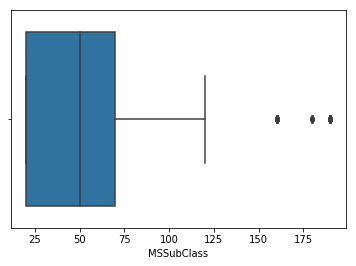

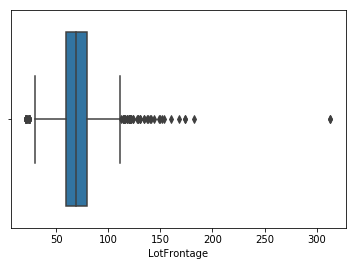

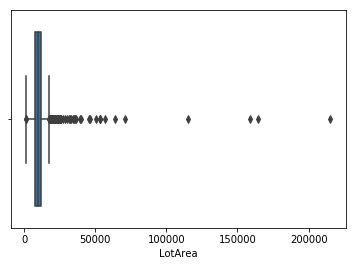

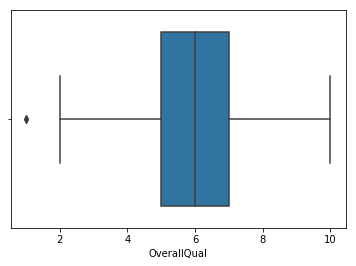

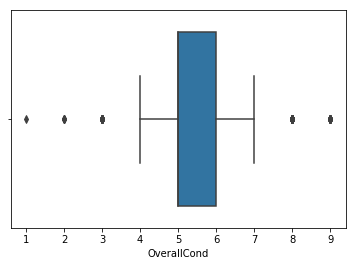

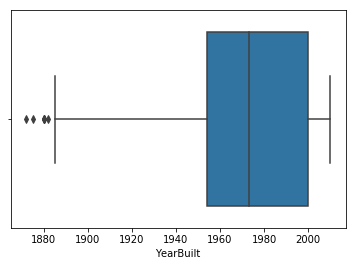

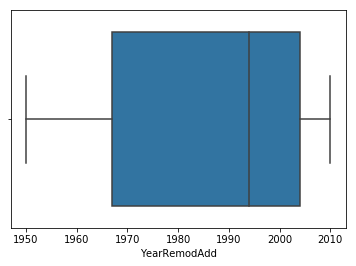

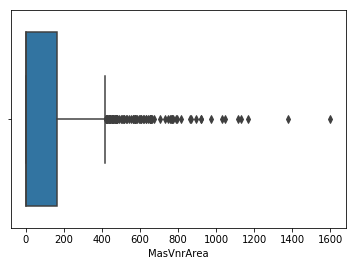

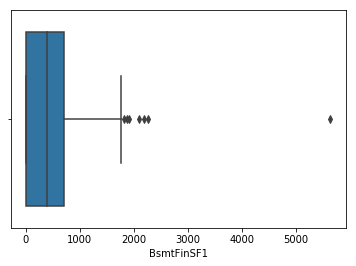

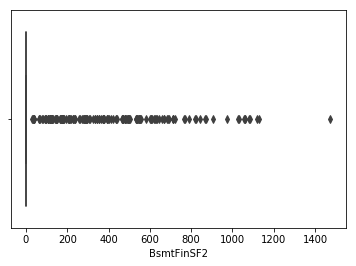

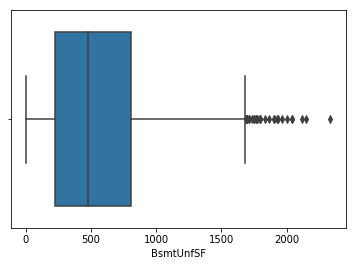

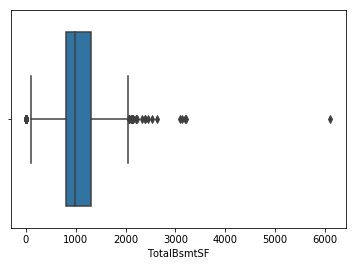

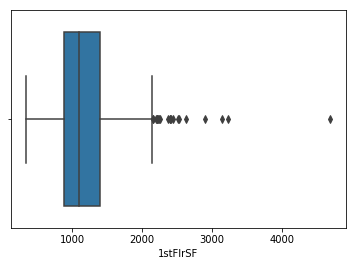

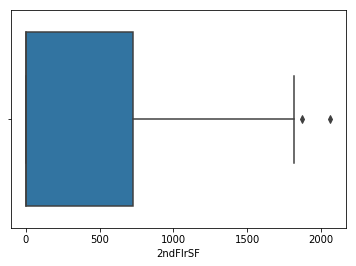

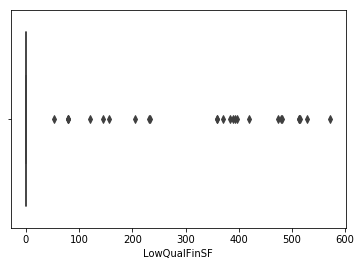

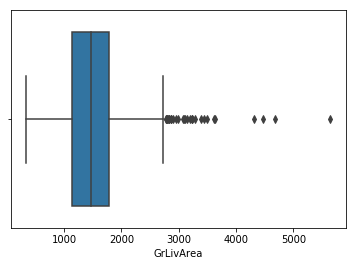

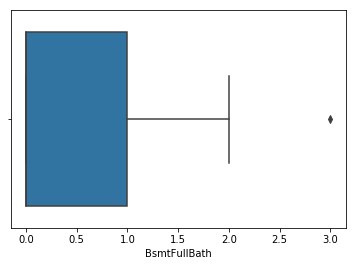

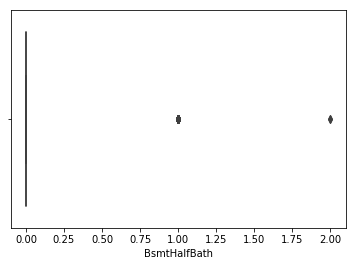

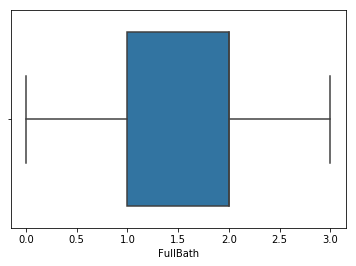

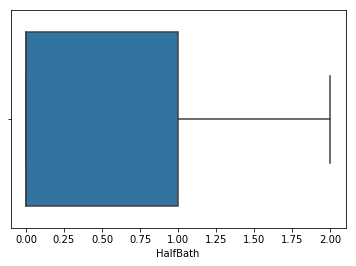

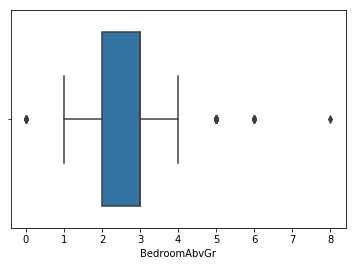

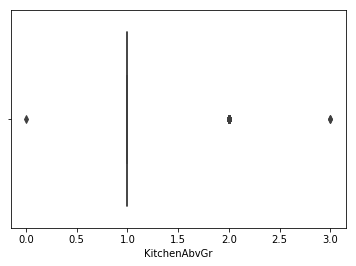

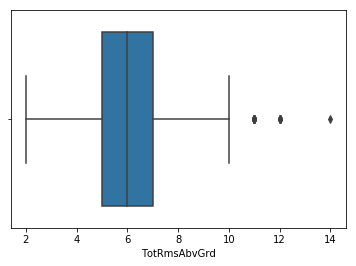

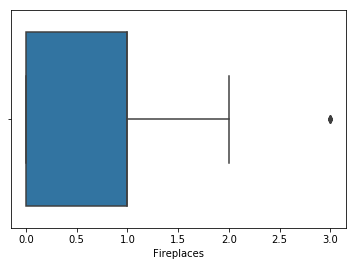

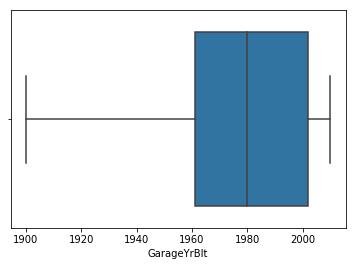

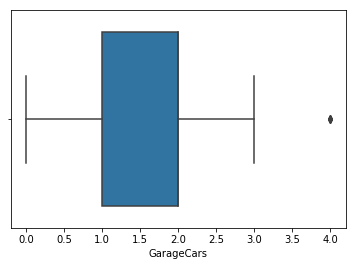

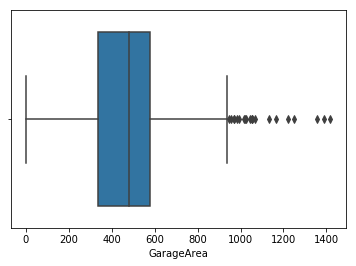

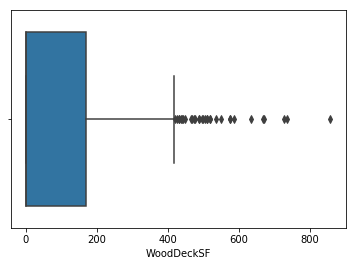

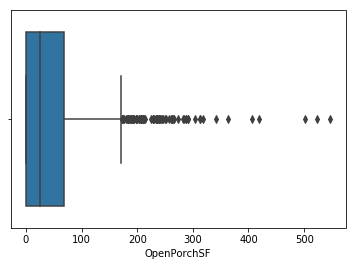

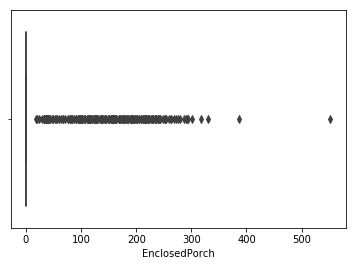

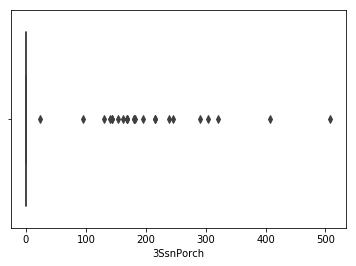

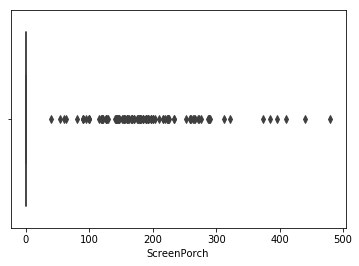

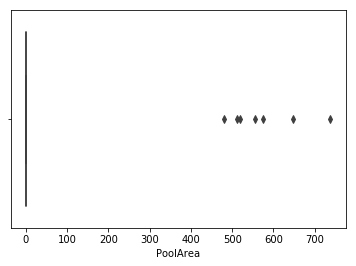

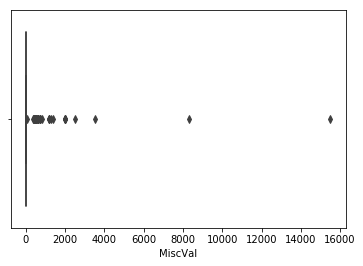

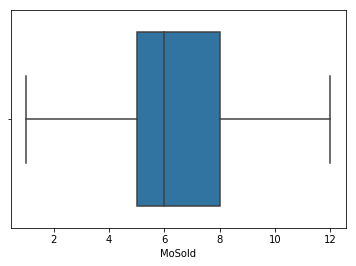

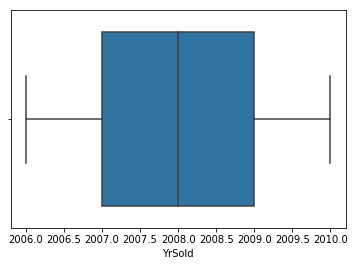

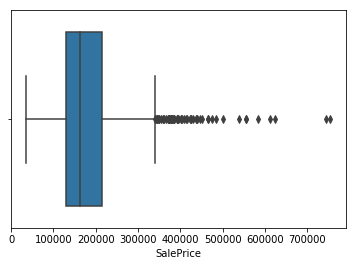

In [117]:
# plotting numeric features for outlier detection
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        sns.boxplot(df[col])
        plt.show()

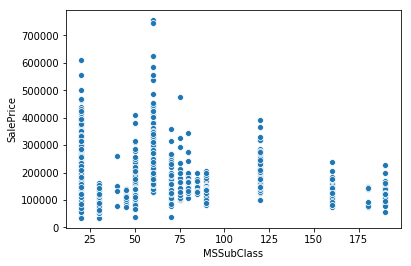

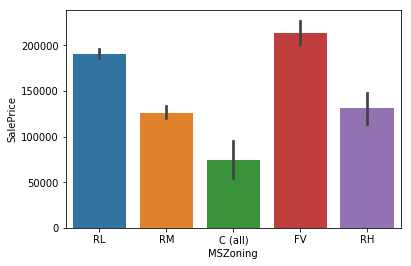

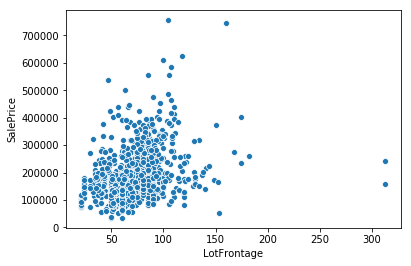

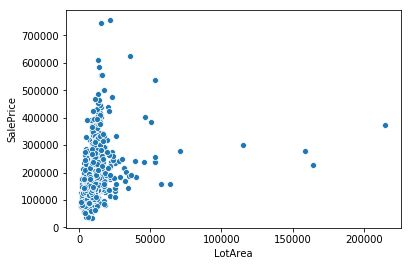

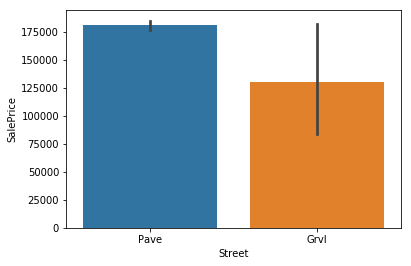

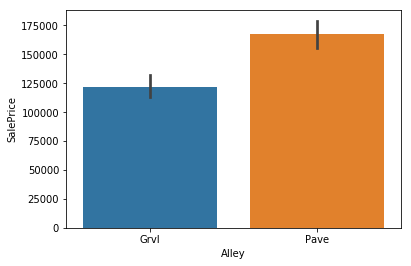

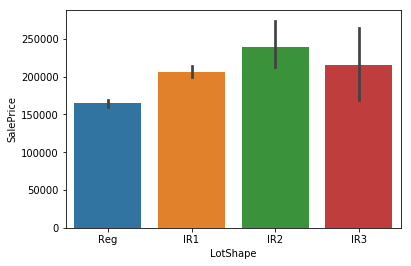

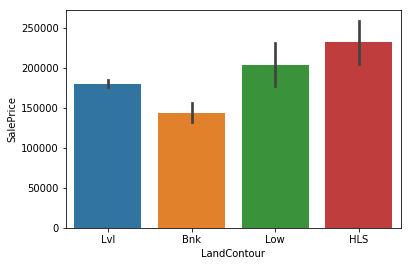

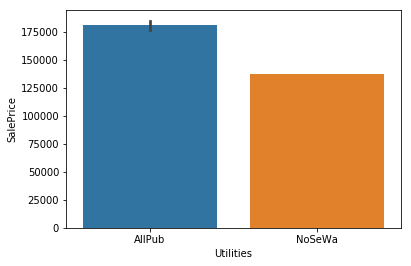

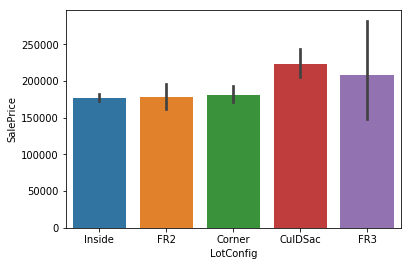

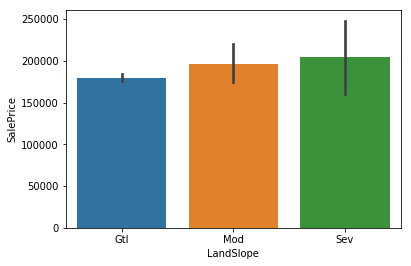

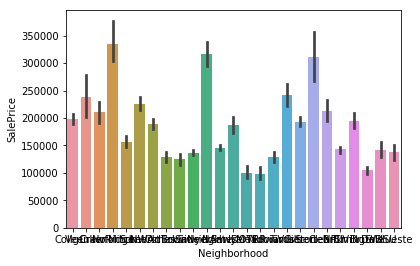

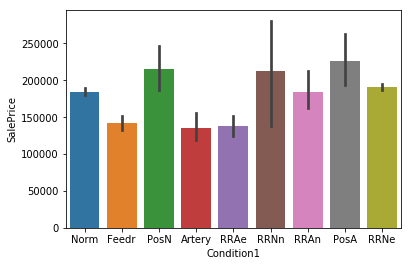

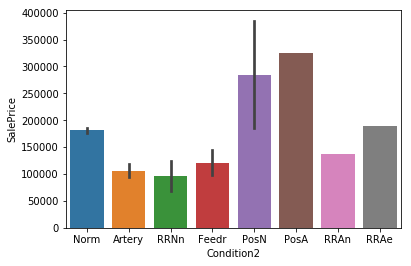

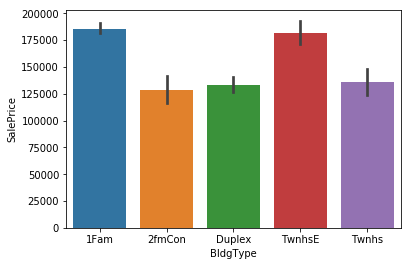

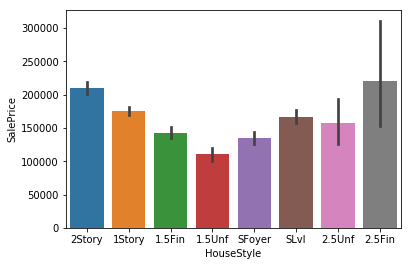

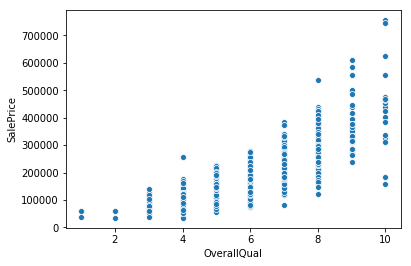

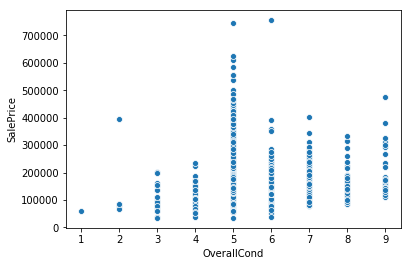

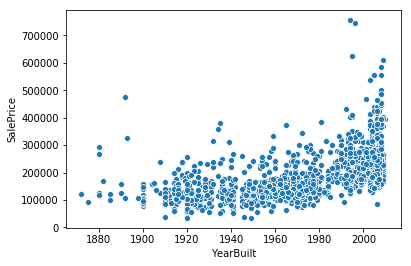

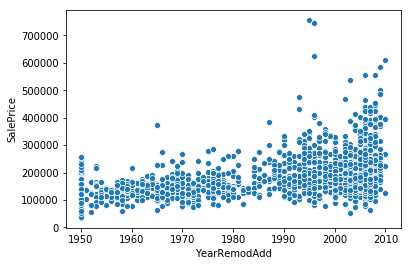

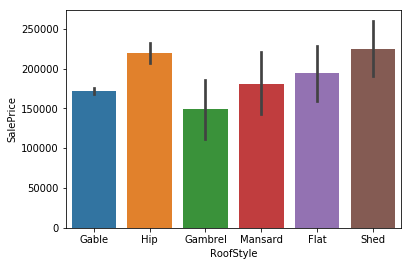

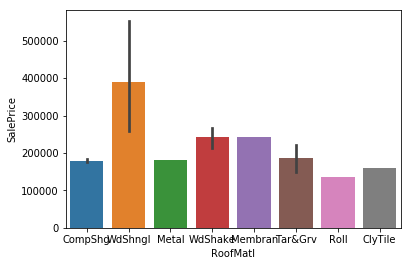

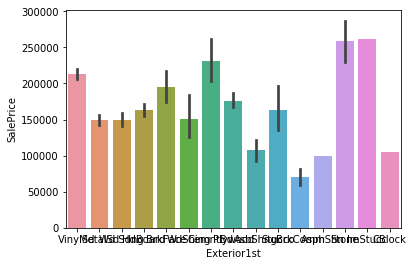

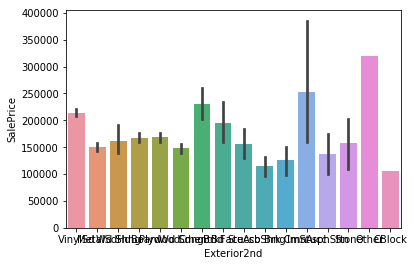

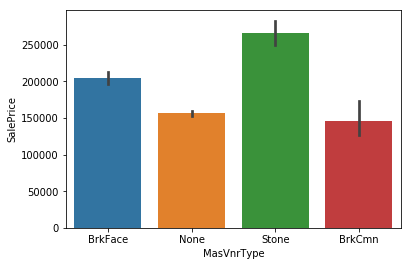

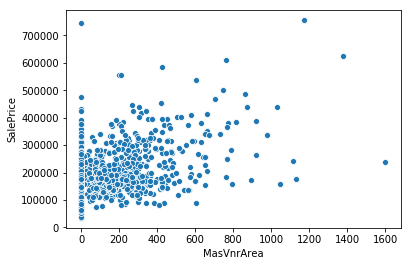

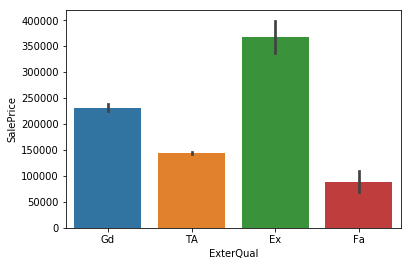

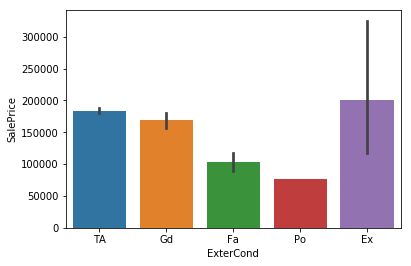

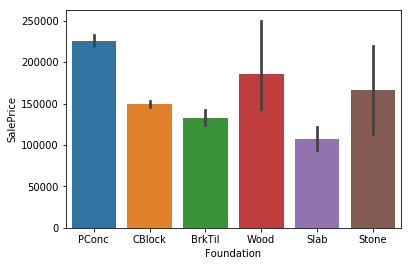

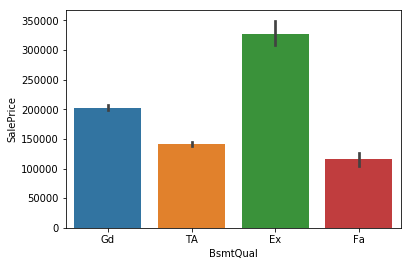

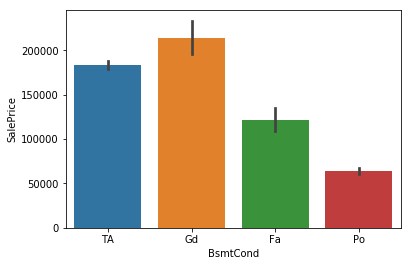

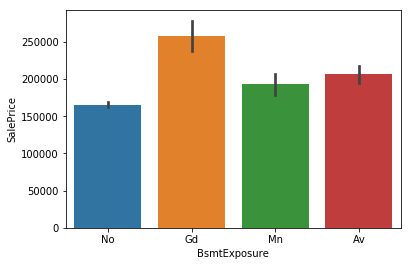

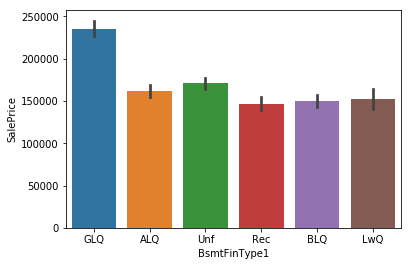

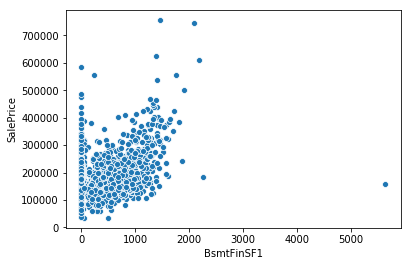

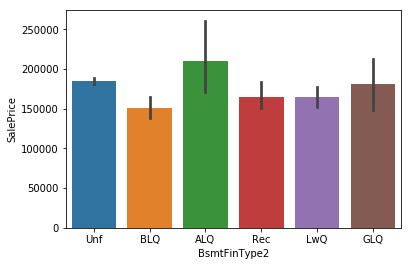

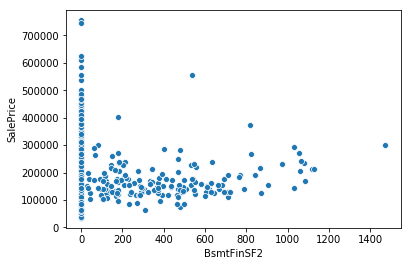

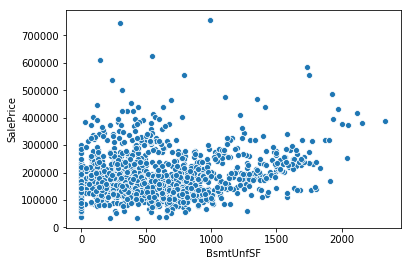

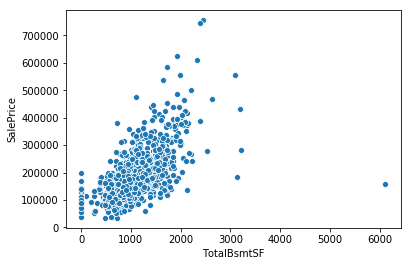

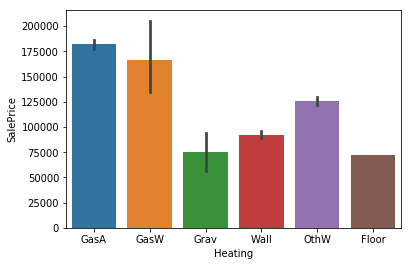

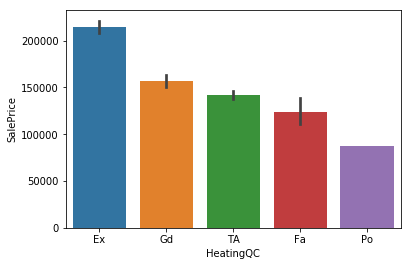

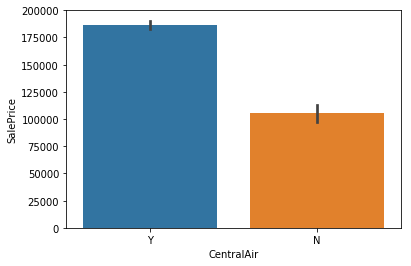

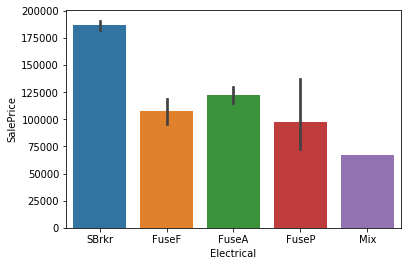

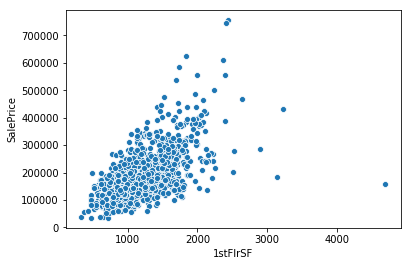

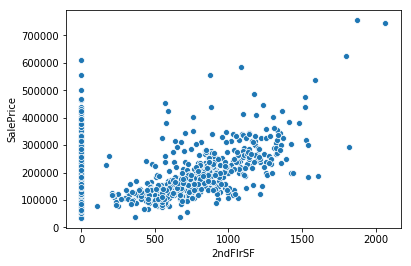

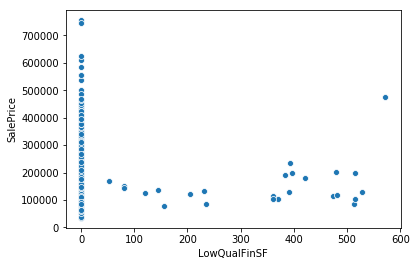

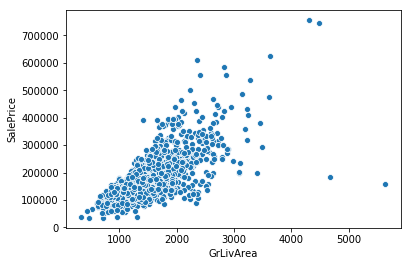

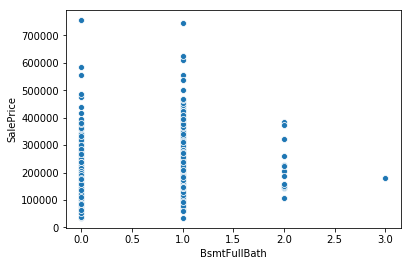

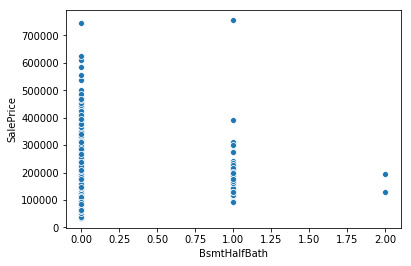

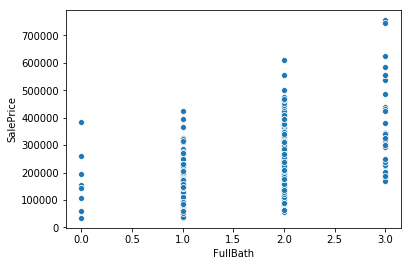

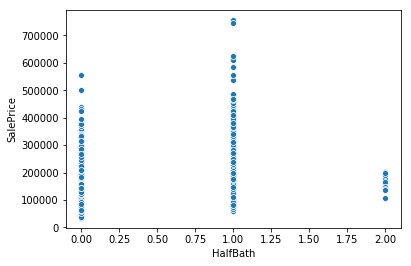

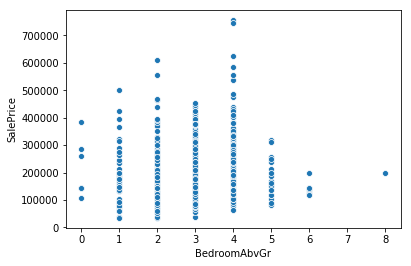

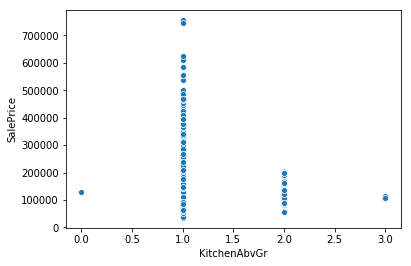

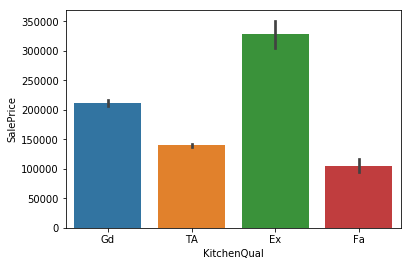

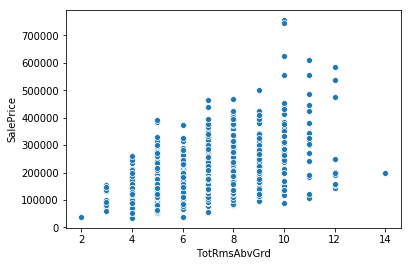

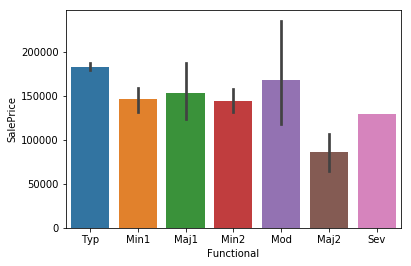

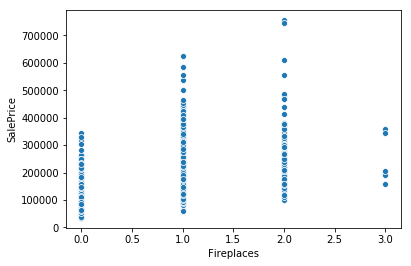

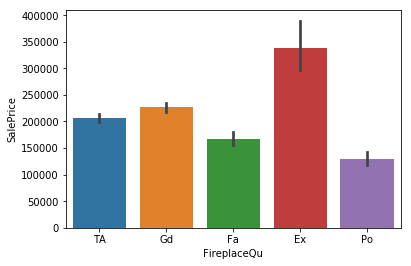

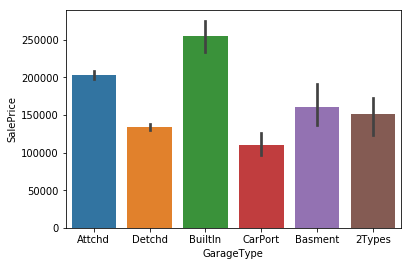

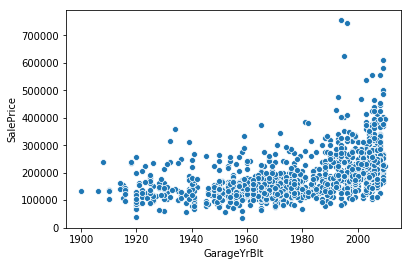

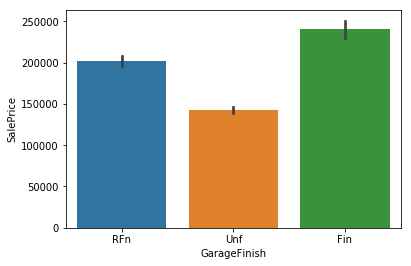

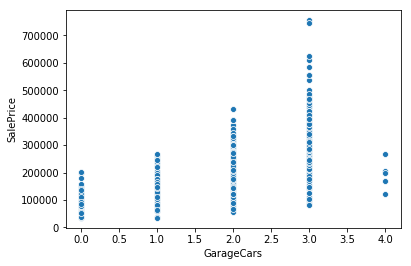

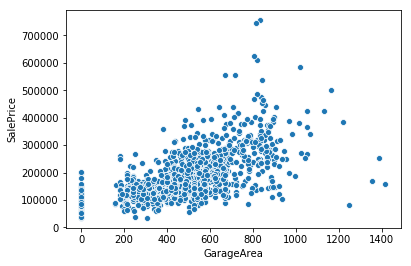

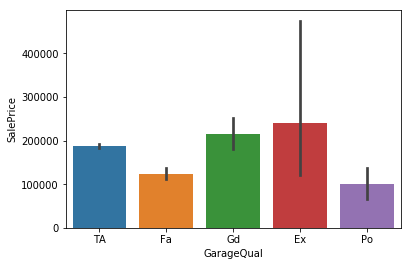

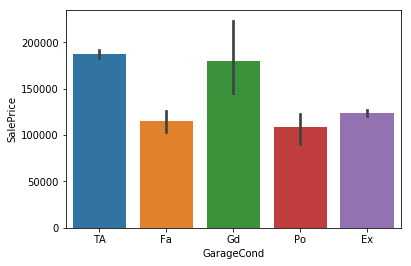

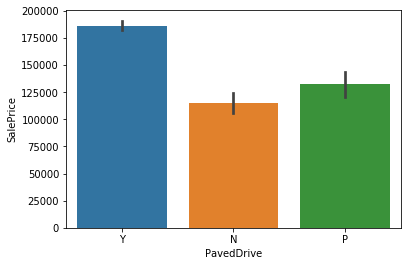

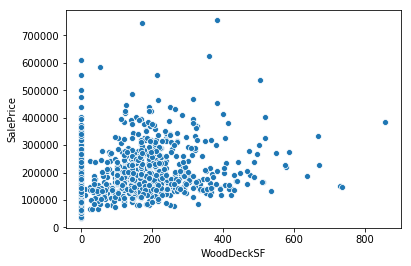

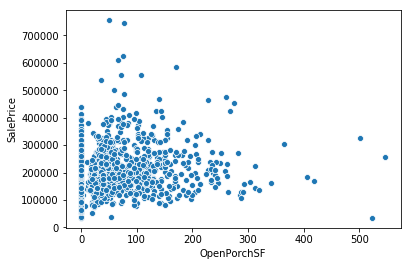

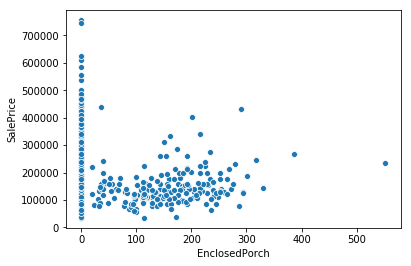

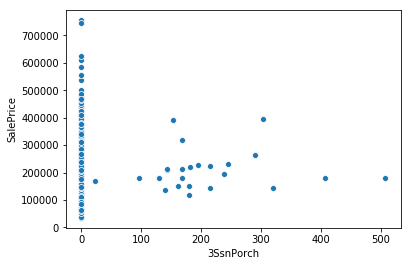

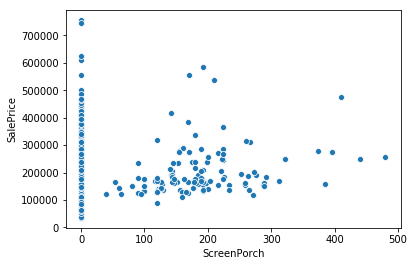

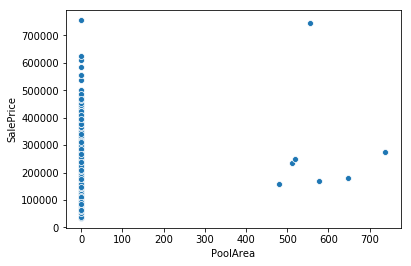

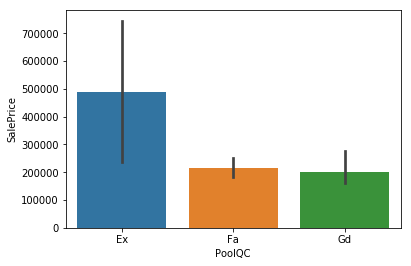

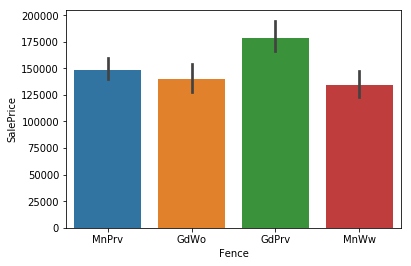

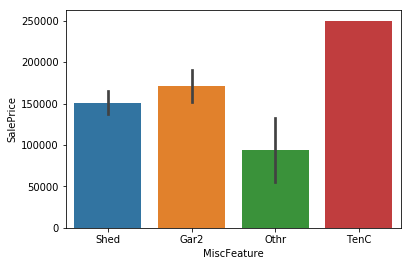

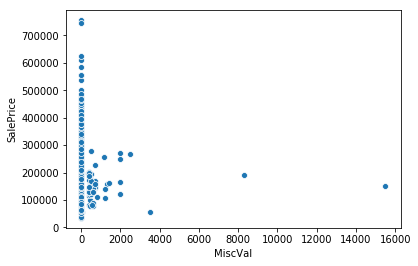

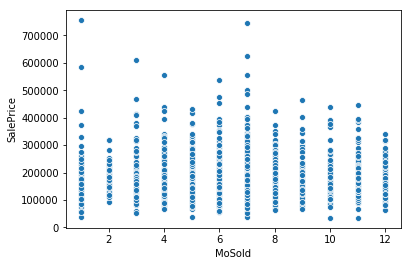

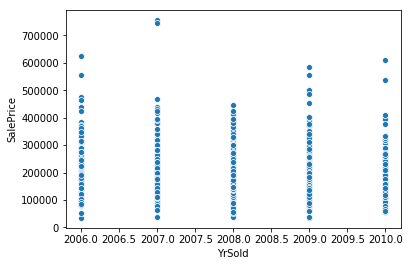

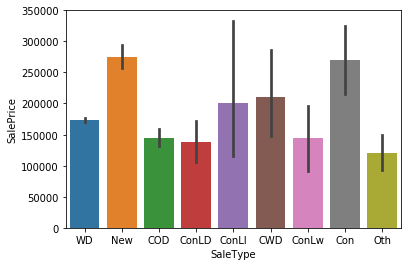

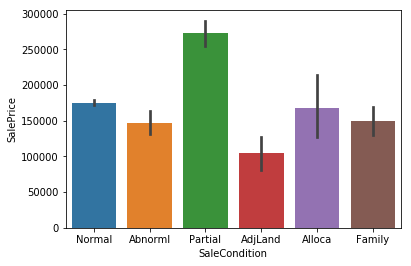

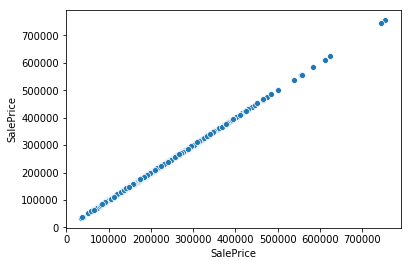

In [126]:
# Bivariate analysis with the SalePrice for both numeric and non-numeric features
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        #print('num')
        plot_numeric(df, col) 
    else:
        #print('cat')
        plot_category(df, col) 

## 2. Data Cleaning

In [176]:
# dropping the columns with missing values > 30% as the misinsg values are vary large to impute
for col in df.columns:
    if df[col].isnull().sum()/len(df[col]) > 0.3:
        df.drop(col, axis = 1, inplace = True)

In [177]:
print(df.shape)
print('data remaining:', round(100*df.shape[0]/init_len,2))

(1460, 75)
data remaining: 100.0


In [178]:
# dropping the columns with just one unique values
for col in df.columns:
    if df[col].nunique() == 1:
        df.drop(col, axis = 1, inplace = True)

In [179]:
print(df.shape)
print('data remaining:', round(100*df.shape[0]/init_len,2))

(1460, 75)
data remaining: 100.0


So, there aren't any feature with just one unique value

In [180]:
# dropping the rows for which null value for the column is < 5% because these would not impact the date, and we have sufficient to build a model
for col in df.columns:
    if df[col].isnull().sum()/len(df[col]) < 0.05:
        df.drop(df.loc[df[col].isnull()].index, axis = 0, inplace = True)

In [181]:
print(df.shape)
print('data remaining:', round(100*df.shape[0]/init_len,2))

(1412, 75)
data remaining: 96.71


In [182]:
# After performing the above operations we find the remaining columns with missing values
for col in df.columns:
    if df[col].isnull().sum()/len(df[col]) > 0:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64': # numeric types
            print(col, round(100*df[col].isnull().sum()/len(df[col]), 2), df[col].dtype,'\n')
            print(df[col].describe())
            print('nunique:',df[col].nunique(),'\n\n')
        else: # non-numeric types
            print(col, round(100*df[col].isnull().sum()/len(df[col]), 2), df[col].dtype,'\n')
            print(df[col].value_counts(),'\n\n')        

LotFrontage 17.78 float64 

count    1161.000000
mean       70.139535
std        24.576015
min        21.000000
25%        59.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
nunique: 110 


GarageType 5.24 object 

Attchd     852
Detchd     369
BuiltIn     85
Basment     19
CarPort      7
2Types       6
Name: GarageType, dtype: int64 


GarageYrBlt 5.24 float64 

count    1338.000000
mean     1978.596413
std        24.773741
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
nunique: 97 


GarageFinish 5.24 object 

Unf    580
RFn    413
Fin    345
Name: GarageFinish, dtype: int64 


GarageQual 5.24 object 

TA    1270
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64 


GarageCond 5.24 object 

TA    1287
Fa      33
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64 




In [183]:
# for the feature 'LotFrontage' mean and median are almost same.
# imputing the null values with mean
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace = True)
print(round(100*df['LotFrontage'].isnull().sum()/len(df['LotFrontage']), 2))

0.0


In [184]:
# for the feature 'GarageType' Attchd is highest. 
# imputing the null values with this
df.loc[df['GarageType'].isnull(),'GarageType'] = 'Attchd'
print(round(100*df['GarageType'].isnull().sum()/len(df['GarageType']), 2))

0.0


In [185]:
# For the feature 'GarageYrBlt', dropping the rows with null values as it would be difficult to impute this value with correct date
df.drop(df.loc[df['GarageYrBlt'].isnull()].index, axis = 0, inplace = True)
print(round(100*df['GarageYrBlt'].isnull().sum()/len(df['GarageYrBlt']), 2))
print(df.shape)
print('data remaining:', round(100*df.shape[0]/init_len,2))

0.0
(1338, 75)
data remaining: 91.64


In [186]:
# for the feature 'GarageFinish', all the features have very comparable count
# so better to drop null rows for it
df.drop(df.loc[df['GarageFinish'].isnull()].index, axis = 0, inplace = True)
print(round(100*df['GarageFinish'].isnull().sum()/len(df['GarageFinish']), 2))
print(df.shape)
print('data remaining:', round(100*df.shape[0]/init_len,2))

0.0
(1338, 75)
data remaining: 91.64


In [187]:
# for the feature 'GarageQual', 'TA'  is highest. 
# imputing the null values with this
df.loc[df['GarageQual'].isnull(),'GarageQual'] = 'TA'
print(round(100*df['GarageQual'].isnull().sum()/len(df['GarageQual']), 2))

0.0


In [188]:
# for the feature 'GarageCond', 'TA'  is highest. 
# imputing the null values with this
df.loc[df['GarageCond'].isnull(),'GarageCond'] = 'TA'
print(round(100*df['GarageCond'].isnull().sum()/len(df['GarageCond']), 2))

0.0


In [189]:
round(100*df.isnull().sum(axis = 0)/df.shape[0],2)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
                ... 
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond   

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 75 columns):
MSSubClass       1338 non-null int64
MSZoning         1338 non-null object
LotFrontage      1338 non-null float64
LotArea          1338 non-null int64
Street           1338 non-null object
LotShape         1338 non-null object
LandContour      1338 non-null object
Utilities        1338 non-null object
LotConfig        1338 non-null object
LandSlope        1338 non-null object
Neighborhood     1338 non-null object
Condition1       1338 non-null object
Condition2       1338 non-null object
BldgType         1338 non-null object
HouseStyle       1338 non-null object
OverallQual      1338 non-null int64
OverallCond      1338 non-null int64
YearBuilt        1338 non-null int64
YearRemodAdd     1338 non-null int64
RoofStyle        1338 non-null object
RoofMatl         1338 non-null object
Exterior1st      1338 non-null object
Exterior2nd      1338 non-null object
MasVnrType       1338 no

Therefore after the null value treatment we are left with 91.64% of the original data set. 

In [191]:
# Creating new features
# years after Remodeled or additions since built
df['Diff_YearBuild_RemodAdd'] = df['YearRemodAdd'] - df['YearBuilt']

# Years after Garage was built since built
df['Diff_YearBuild_GarageYrBlt'] = df['GarageYrBlt'] - df['YearBuilt']

# Years after Garage was built since remodeled or additions
df['Diff_RemodAdd_GarageYrBlt'] = df['GarageYrBlt'] - df['YearRemodAdd']

# years sold since built
df['Diff_YrSold_YearBuild'] = df['YrSold'] - df['YearBuilt']

# years sold since remodeled or additions
df['Diff_YrSold_RemodAdd'] = df['YrSold'] - df['YearRemodAdd']

In [192]:
df.shape

(1338, 80)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass                    1338 non-null int64
MSZoning                      1338 non-null object
LotFrontage                   1338 non-null float64
LotArea                       1338 non-null int64
Street                        1338 non-null object
LotShape                      1338 non-null object
LandContour                   1338 non-null object
Utilities                     1338 non-null object
LotConfig                     1338 non-null object
LandSlope                     1338 non-null object
Neighborhood                  1338 non-null object
Condition1                    1338 non-null object
Condition2                    1338 non-null object
BldgType                      1338 non-null object
HouseStyle                    1338 non-null object
OverallQual                   1338 non-null int64
OverallCond                   1338 non-null int64
YearBuilt                    

In [242]:
def IQR_outlier_treatment(df, lst):
    '''for outlier treatment based on IQR method'''
    for col in lst:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]
    return df

In [294]:
# list of features for outlier treatment
lst = ['BsmtFinSF1', 'BedroomAbvGr', 'TotRmsAbvGrd','Fireplaces'] 

In [371]:
# calling the function
df2 = df.copy()
df2 = IQR_outlier_treatment(df2, lst)
print(df2.shape)
print('data remaining:', round(100*df2.shape[0]/init_len,2))

(1282, 80)
data remaining: 87.81


So we are left with 87.81% of original data after outlier treatment

## 3. Data Preparation

In [296]:
def create_dummy(df):
    '''function that creates dummy variable for the categorical features
    and return the updated DataFrame'''
    for col in df.columns: # extracting the feature
        if df[col].dtype == 'O': # is the feature type object ?
            dummy = pd.get_dummies(df[col], prefix = col, drop_first = True) # creating dummy variable and dropping the original column
            df = pd.concat([df, dummy], axis = 1) # concatenating the dummy variables with the original DataFrame
            df.drop(col, axis = 1, inplace = True)
    return (df) 

In [297]:
def numeric_feature_list(df):
    '''creates a list of numeric features for scaling'''
    numf_list = [col for col in df.columns if df[col].dtype == 'float64' or df[col].dtype == 'int64']
    return numf_list            

In [298]:
numf_list = numeric_feature_list(df2)
numf_list.remove('SalePrice')
print(numf_list)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Diff_YearBuild_RemodAdd', 'Diff_YearBuild_GarageYrBlt', 'Diff_RemodAdd_GarageYrBlt', 'Diff_YrSold_YearBuild', 'Diff_YrSold_RemodAdd']


In [299]:
df_dummy = create_dummy(df2)
print(df_dummy.shape)

(1282, 230)


In [300]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1282 entries, 0 to 1459
Columns: 230 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(5), int64(37), uint8(188)
memory usage: 666.0 KB


In [301]:
df_dummy.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [302]:
# predictors and response variables
y = df_dummy.loc[:, 'SalePrice']
X = df_dummy.loc[:, df_dummy.columns != 'SalePrice']

In [303]:
print(y.shape)
print(X.shape)

(1282,)
(1282, 229)


In [304]:
# train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (897, 229)
X_test: (385, 229)
y_train: (897,)
y_test: (385,)


In [305]:
# scaling the non dummy numerical features
scaler = StandardScaler()
X_train.loc[:, numf_list] = scaler.fit_transform(X_train.loc[:, numf_list])
#X_train = pd.DataFrame(data = X_train, columns = col)
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
95,0.156468,-0.018645,-0.063157,-0.144264,2.214058,0.676172,0.345138,-0.226030,-0.343195,-0.294887,...,0,0,0,0,1,0,0,0,1,0
725,-0.842475,-0.503968,-0.346046,-1.694023,0.354498,-0.111169,-0.792147,-0.598258,-0.187129,1.193980,...,0,0,0,0,1,0,0,0,1,0
1435,-0.842475,0.453321,-0.200819,-0.144264,3.143837,-0.385027,0.938504,0.699065,-1.087510,-0.294887,...,0,0,0,0,0,0,0,0,0,0
436,-0.093268,-1.461257,-0.604227,-0.144264,2.214058,-1.822781,-1.781091,-0.598258,-1.087510,-0.294887,...,0,0,0,0,1,0,0,0,1,0
849,0.655939,0.453321,-0.079797,-0.144264,1.284278,0.094225,0.394585,1.372360,-1.087510,-0.294887,...,0,0,0,0,1,0,0,0,1,0


In [306]:
# Making a copy of train data set for Ridge and Lasso Regression
X_train_Lasso = X_train.copy()
X_train_Ridge = X_train.copy()
y_train_Lasso = y_train.copy()
y_train_Ridge = y_train.copy()

## 4. Model Building and Evaluation

### 4.1 Lasso Regression

In [307]:
# Setting up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

In [308]:
# specifying range of hyperparameters to tune
#params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100, 150, 200, 250, 300]}

In [309]:
# Grid search cross validation for lasso model
lasso = Lasso()
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring = 'neg_mean_absolute_error', cv = folds, 
                       return_train_score = True, verbose = True)
model_cv.fit(X_train_Lasso, y_train_Lasso)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   15.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100, 150, 200, 250, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=True)

In [310]:
# Creating a DataFrame out of the cross validation result
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.334393,0.015936,0.003125,0.00625,0.0001,{'alpha': 0.0001},-18612.732384,-15759.519376,-17270.378515,-16995.954500,...,-16887.048127,1059.769251,12,-11148.094847,-10859.871349,-11308.126620,-11211.324697,-11256.467258,-11156.776954,157.511048
1,0.350019,0.041459,0.000000,0.00000,0.001,{'alpha': 0.001},-18612.199370,-15759.659832,-17270.255318,-16995.707221,...,-16886.859326,1059.588392,11,-11148.094118,-10859.871425,-11308.123812,-11211.323090,-11256.484344,-11156.779358,157.512540
2,0.377315,0.031451,0.000400,0.00049,0.01,{'alpha': 0.01},-18606.935096,-15761.379204,-17269.066685,-16993.313319,...,-16885.121365,1057.688765,10,-11148.210952,-10859.887857,-11308.172207,-11211.340452,-11256.695352,-11156.861364,157.542287
3,0.319507,0.019175,0.000000,0.00000,0.1,{'alpha': 0.1},-18553.581248,-15780.329474,-17257.846806,-16968.355789,...,-16867.220365,1038.893364,9,-11150.249178,-10860.216817,-11308.777922,-11212.227406,-11258.697013,-11158.033667,157.828626
4,0.331267,0.020730,0.000000,0.00000,1,{'alpha': 1},-18077.480109,-15789.955752,-17163.842825,-16737.764170,...,-16668.150291,918.984430,8,-11176.787505,-10865.384806,-11315.343038,-11227.845151,-11281.072939,-11173.286688,160.990890


In [311]:
cv_results.shape

(12, 21)

In [312]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [313]:
cv_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 21 columns):
mean_fit_time         12 non-null float64
std_fit_time          12 non-null float64
mean_score_time       12 non-null float64
std_score_time        12 non-null float64
param_alpha           12 non-null object
params                12 non-null object
split0_test_score     12 non-null float64
split1_test_score     12 non-null float64
split2_test_score     12 non-null float64
split3_test_score     12 non-null float64
split4_test_score     12 non-null float64
mean_test_score       12 non-null float64
std_test_score        12 non-null float64
rank_test_score       12 non-null int32
split0_train_score    12 non-null float64
split1_train_score    12 non-null float64
split2_train_score    12 non-null float64
split3_train_score    12 non-null float64
split4_train_score    12 non-null float64
mean_train_score      12 non-null float64
std_train_score       12 non-null float64
dtypes: float64(18)

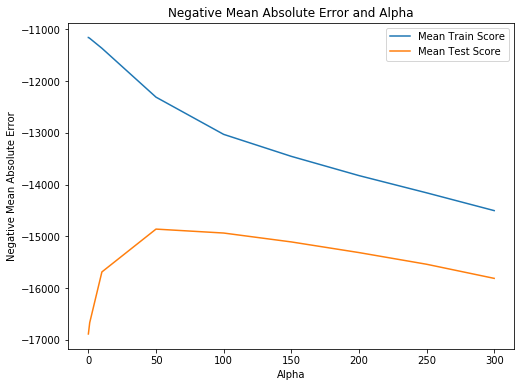

In [314]:
# Plotting the 'mean_test_score' and 'mean_train_score' with 'param_alpha'
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float64')
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.set(title = 'Negative Mean Absolute Error and Alpha', xlabel = 'Alpha', ylabel = 'Negative Mean Absolute Error')
ax.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label = 'Mean Train Score')
ax.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label = 'Mean Test Score')
ax.legend()
plt.show()

From the above plot the optimal value of alpha for ridge regression comes out to be 50

In [315]:
# Training the Lasso model with the optimal alpha
optimal_alpha = 50
lm_Lasso = Lasso(alpha = optimal_alpha)
lm_Lasso.fit(X_train_Lasso, y_train_Lasso)

Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [316]:
# Analyzing the Lasso model parameters
lm_Lasso.coef_

array([-5.25067027e+03,  1.60193072e+03,  6.56605483e+03,  1.21066533e+04,
        6.04803236e+03,  5.81287220e+03,  1.42267331e+03,  2.87898481e+03,
        7.21344860e+03,  2.40785249e+03, -0.00000000e+00,  8.16897235e+03,
        0.00000000e+00,  3.58815900e+03, -7.27582320e+02,  2.33048535e+04,
        9.32491665e+02, -3.55433399e+02, -7.03742652e+02, -0.00000000e+00,
       -3.03975703e+03, -1.00810510e+03,  2.08686275e+03,  1.75645290e+02,
        1.94597389e+01,  3.71660365e+03,  5.22937979e+02,  3.52055616e+03,
        1.96164750e+03, -6.74520927e+02,  1.12406907e+03,  1.73421372e+03,
        0.00000000e+00,  1.56527617e+02, -7.61974072e+00, -6.20306663e+02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -2.92644644e+03,
       -1.28025826e+03,  7.76917629e+03,  0.00000000e+00,  4.57574433e+03,
       -0.00000000e+00,  2.23332990e+04,  1.73732300e+03, -0.00000000e+00,
        4.47924852e+02,  6.57578995e+03, -9.79250871e+03, -0.00000000e+00,
       -0.00000000e+00,  

In [317]:
# lasso model parameters
model_parameters = list(lm_Lasso.coef_)
model_parameters.insert(0, lm_Lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list_params = list(zip(cols, model_parameters))
list_params

[('constant', 173781.417),
 ('MSSubClass', -5250.67),
 ('LotFrontage', 1601.931),
 ('LotArea', 6566.055),
 ('OverallQual', 12106.653),
 ('OverallCond', 6048.032),
 ('YearBuilt', 5812.872),
 ('YearRemodAdd', 1422.673),
 ('MasVnrArea', 2878.985),
 ('BsmtFinSF1', 7213.449),
 ('BsmtFinSF2', 2407.852),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 8168.972),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 3588.159),
 ('LowQualFinSF', -727.582),
 ('GrLivArea', 23304.853),
 ('BsmtFullBath', 932.492),
 ('BsmtHalfBath', -355.433),
 ('FullBath', -703.743),
 ('HalfBath', -0.0),
 ('BedroomAbvGr', -3039.757),
 ('KitchenAbvGr', -1008.105),
 ('TotRmsAbvGrd', 2086.863),
 ('Fireplaces', 175.645),
 ('GarageYrBlt', 19.46),
 ('GarageCars', 3716.604),
 ('GarageArea', 522.938),
 ('WoodDeckSF', 3520.556),
 ('OpenPorchSF', 1961.647),
 ('EnclosedPorch', -674.521),
 ('3SsnPorch', 1124.069),
 ('ScreenPorch', 1734.214),
 ('PoolArea', 0.0),
 ('MiscVal', 156.528),
 ('MoSold', -7.62),
 ('YrSold', -620.307),
 ('Diff_YearBuild_RemodAdd', 

In [318]:
# creating a zipped list with feature name and non-zero coefficient 
list_significant_features = [list_params[cols][0] for cols in range(len(list_params)) if list_params[cols][1] != 0.0]
list_significant_features_coeff = [list_params[cols][1] for cols in range(len(list_params)) if list_params[cols][1] != 0.0]
significant_features_list = list(zip(list_significant_features, list_significant_features_coeff))
print(len(significant_features_list))
significant_features_list

133


[('constant', 173781.417),
 ('MSSubClass', -5250.67),
 ('LotFrontage', 1601.931),
 ('LotArea', 6566.055),
 ('OverallQual', 12106.653),
 ('OverallCond', 6048.032),
 ('YearBuilt', 5812.872),
 ('YearRemodAdd', 1422.673),
 ('MasVnrArea', 2878.985),
 ('BsmtFinSF1', 7213.449),
 ('BsmtFinSF2', 2407.852),
 ('TotalBsmtSF', 8168.972),
 ('2ndFlrSF', 3588.159),
 ('LowQualFinSF', -727.582),
 ('GrLivArea', 23304.853),
 ('BsmtFullBath', 932.492),
 ('BsmtHalfBath', -355.433),
 ('FullBath', -703.743),
 ('BedroomAbvGr', -3039.757),
 ('KitchenAbvGr', -1008.105),
 ('TotRmsAbvGrd', 2086.863),
 ('Fireplaces', 175.645),
 ('GarageYrBlt', 19.46),
 ('GarageCars', 3716.604),
 ('GarageArea', 522.938),
 ('WoodDeckSF', 3520.556),
 ('OpenPorchSF', 1961.647),
 ('EnclosedPorch', -674.521),
 ('3SsnPorch', 1124.069),
 ('ScreenPorch', 1734.214),
 ('MiscVal', 156.528),
 ('MoSold', -7.62),
 ('YrSold', -620.307),
 ('Diff_YrSold_YearBuild', -2926.446),
 ('Diff_YrSold_RemodAdd', -1280.258),
 ('MSZoning_FV', 7769.176),
 ('MSZo

### Evaluating the Lasso training model

In [319]:
def adjusted_r2_score(y, y_predict, X):
    '''calculates and returns the r2_score and the adjusted r2_score (based on formula)'''
    r2 = r2_score(y, y_predict)
    n = X.shape[0]
    d = len(X.columns)
    adj_r2_score = 1 - ((1 - r2) * (n - 1) / (n - d - 1))
    return (round(r2, 2), round(adj_r2_score, 2))    

In [320]:
# predicting the SalePrice using the training data set
y_train_predict_Lasso = lm_Lasso.predict(X_train_Lasso)

In [321]:
# r2_score and adjusted_r2_score for model on training data set
r2, adj_r2 = adjusted_r2_score(y_train_Lasso, y_train_predict_Lasso, X_train_Lasso)
print('r2_score = ', r2)
print('adjusted r2_score = ', adj_r2)

r2_score =  0.93
adjusted r2_score =  0.91


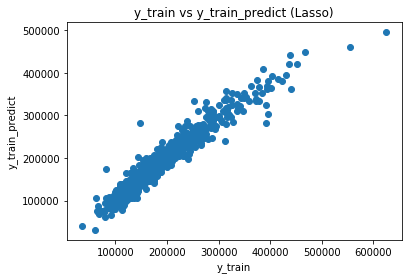

In [322]:
# Plotting y_train vs y_train_predict sprrad
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title = 'y_train vs y_train_predict (Lasso)', xlabel = 'y_train', ylabel = 'y_train_predict')
ax.scatter(y_train_Lasso, y_train_predict_Lasso)
plt.show()

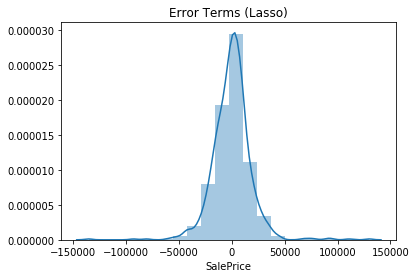

In [323]:
# Residual analysis by plotting the histogram of error terms
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title = 'Error Terms (Lasso)', xlabel = 'Errors')
sns.distplot(y_train_Lasso - y_train_predict_Lasso, bins = 20)
plt.show()

### Making predictions on the test data set using the above Lasso model

In [324]:
# Scaling the test data set
X_test.loc[:, numf_list] = scaler.transform(X_test.loc[:, numf_list])
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1400,-0.093268,-0.982613,-0.442864,-0.144264,1.284278,-1.514690,-1.781091,-0.598258,-1.087510,-0.294887,...,0,0,0,0,1,0,0,0,1,0
1361,-0.842475,2.559356,0.581589,0.630615,-0.575282,1.086959,0.938504,-0.510675,1.971383,-0.294887,...,0,0,0,0,1,0,0,0,1,0
1311,-0.842475,-0.121053,-0.159067,0.630615,-0.575282,1.086959,1.037399,-0.160343,1.133429,-0.294887,...,0,0,1,0,0,0,0,0,0,1
366,-0.842475,-0.018645,-0.089882,-0.144264,-0.575282,-0.350795,-1.138277,0.753805,0.374708,-0.294887,...,0,0,0,0,1,0,0,0,1,0
341,-0.842475,-0.503968,-0.200819,-1.694023,-1.505062,-0.795814,-1.781091,-0.598258,-1.087510,-0.294887,...,0,0,0,0,1,0,0,0,1,0


In [325]:
# Making a copy of test data set for Ridge and Lasso Regression
X_test_Lasso = X_test.copy()
X_test_Ridge = X_test.copy()
y_test_Lasso = y_test.copy()
y_test_Ridge = y_test.copy()

In [326]:
# predicting the SalePrice using the Lasso model on the test data set
y_test_predict_Lasso = lm_Lasso.predict(X_test_Lasso)

In [327]:
# r2_score and adjusted_r2_score for model on test data set
r2, adj_r2 = adjusted_r2_score(y_test_Lasso, y_test_predict_Lasso, X_test_Lasso)
print('r2_score = ', r2)
print('adjusted r2_score = ', adj_r2)

r2_score =  0.91
adjusted r2_score =  0.78


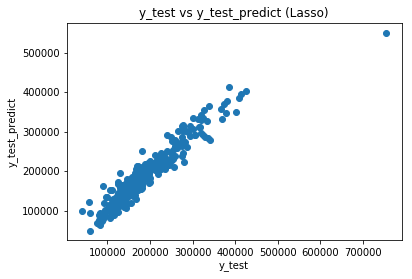

In [328]:
# Plotting y_train vs y_train_predict sprrad
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title = 'y_test vs y_test_predict (Lasso)', xlabel = 'y_test', ylabel = 'y_test_predict')
ax.scatter(y_test_Lasso, y_test_predict_Lasso)
plt.show()

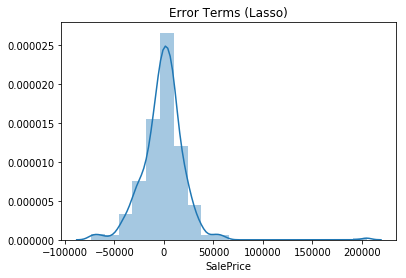

In [329]:
# Residual analysis by plotting the histogram of error terms
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title = 'Error Terms (Lasso)', xlabel = 'Errors')
sns.distplot(y_test_Lasso - y_test_predict_Lasso,bins = 20)
plt.show()

### 4.2 Ridge Regression

In [330]:
# Setting up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

In [331]:
# specifying range of hyperparameters to tune
#params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
params = {'alpha': [0.1, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,120, 130, 140, 150]}

In [332]:
# Grid search cross validation for lasso model
ridge = Ridge()
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring = 'neg_mean_absolute_error', cv = folds, 
                       return_train_score = True, verbose = True)
model_cv.fit(X_train_Ridge, y_train_Ridge)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.1, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 130, 140, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=True)

In [333]:
# Creating a DataFrame out of the cross validation result
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.312516,5.937807e-01,0.000000,0.000000,0.1,{'alpha': 0.1},-16685.317915,-15738.396270,-16971.344935,-15924.324652,...,-16116.542635,626.441923,12,-11278.402737,-10916.364245,-11336.268410,-11316.422254,-11332.938543,-11236.079238,161.172920
1,0.015628,2.129279e-06,0.000000,0.000000,1,{'alpha': 1},-15249.852456,-15683.588674,-16463.429462,-14504.961015,...,-15237.330713,793.124647,3,-11841.023137,-11315.350918,-11535.374318,-11790.925165,-11799.875519,-11656.509811,201.856176
2,0.012501,6.250453e-03,0.003124,0.006249,10,{'alpha': 10},-14647.330258,-15747.839950,-16092.395539,-13813.393287,...,-14819.667264,956.255079,1,-12985.881552,-12406.684782,-12445.935878,-12927.958586,-12941.401091,-12741.572378,258.421728
3,0.015626,5.135693e-07,0.000000,0.000000,20,{'alpha': 20},-14857.436819,-16256.208679,-16245.333558,-14218.689494,...,-15097.903810,990.442032,2,-13560.079242,-12973.409632,-13036.648071,-13532.124637,-13519.898025,-13324.431921,261.881314
4,0.012500,6.249810e-03,0.003126,0.006251,30,{'alpha': 30},-15016.777944,-16565.104751,-16323.142581,-14526.418433,...,-15293.403878,993.675084,4,-13940.852076,-13326.774124,-13451.892266,-13933.263826,-13931.666305,-13716.889720,270.377403


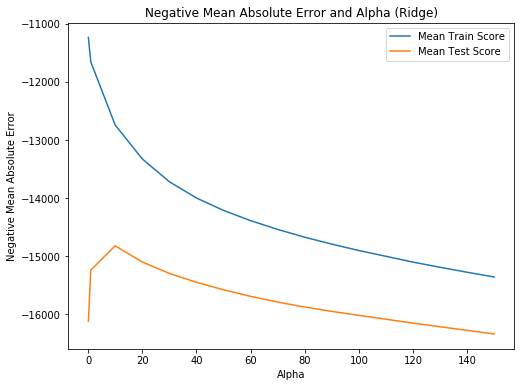

In [334]:
# Plotting the 'mean_test_score' and 'mean_train_score' with 'param_alpha'
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float64')
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.set(title = 'Negative Mean Absolute Error and Alpha (Ridge)', xlabel = 'Alpha', ylabel = 'Negative Mean Absolute Error')
ax.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label = 'Mean Train Score')
ax.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label = 'Mean Test Score')
ax.legend()
plt.show()

From the above plot we can see that the optimal value of alpha for ridge regression is 10

In [335]:
# Training the Lasso model with the optimal alpha
optimal_alpha = 10
lm_Ridge = Ridge(alpha = optimal_alpha)
lm_Ridge.fit(X_train_Ridge, y_train_Ridge)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

### Evaluating the Ridge training model

In [336]:
# predicting the SalePrice using the training data set
y_train_predict_Ridge = lm_Ridge.predict(X_train_Ridge)

In [337]:
# r2_score and adjusted_r2_score for model on test data set
r2, adj_r2 = adjusted_r2_score(y_train_Ridge, y_train_predict_Ridge, X_train_Ridge)
print('r2_score = ', r2)
print('adjusted r2_score = ', adj_r2)

r2_score =  0.93
adjusted r2_score =  0.91


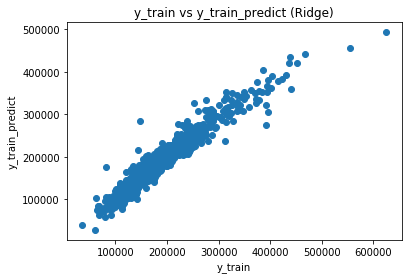

In [338]:
# Plotting y_train vs y_train_predict sprrad
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title = 'y_train vs y_train_predict (Ridge)', xlabel = 'y_train', ylabel = 'y_train_predict')
ax.scatter(y_train_Ridge, y_train_predict_Ridge)
plt.show()

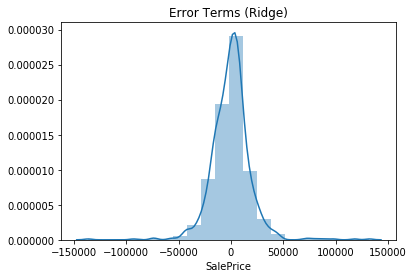

In [339]:
# Residual analysis by plotting the histogram of error terms
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title = 'Error Terms (Ridge)', xlabel = 'Errors')
sns.distplot(y_train_Ridge - y_train_predict_Ridge,bins = 20)
plt.show()

### Making predictions on the test data set using the above Ridge model

In [340]:
# predicting the SalePrice using the Lasso model on the test data set
y_test_predict_Ridge = lm_Ridge.predict(X_test_Ridge)

In [341]:
# r2_score and adjusted_r2_score for model on test data set
r2, adj_r2 = adjusted_r2_score(y_test_Ridge, y_test_predict_Ridge, X_test_Ridge)
print('r2_score = ', r2)
print('adjusted r2_score = ', adj_r2)

r2_score =  0.91
adjusted r2_score =  0.78


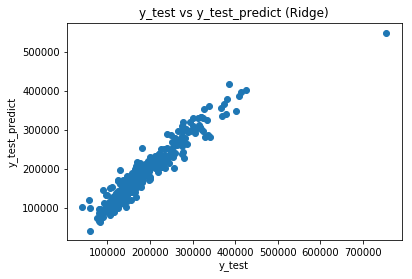

In [342]:
# Plotting y_train vs y_train_predict sprrad
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title = 'y_test vs y_test_predict (Ridge)', xlabel = 'y_test', ylabel = 'y_test_predict')
ax.scatter(y_test_Ridge, y_test_predict_Ridge)
plt.show()

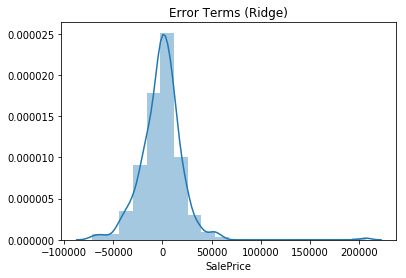

In [343]:
# Residual analysis by plotting the histogram of error terms
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title = 'Error Terms (Ridge)', xlabel = 'Errors')
sns.distplot(y_test_Ridge - y_test_predict_Ridge,bins = 20)
plt.show()

In [344]:
significant_features_list

[('constant', 173781.417),
 ('MSSubClass', -5250.67),
 ('LotFrontage', 1601.931),
 ('LotArea', 6566.055),
 ('OverallQual', 12106.653),
 ('OverallCond', 6048.032),
 ('YearBuilt', 5812.872),
 ('YearRemodAdd', 1422.673),
 ('MasVnrArea', 2878.985),
 ('BsmtFinSF1', 7213.449),
 ('BsmtFinSF2', 2407.852),
 ('TotalBsmtSF', 8168.972),
 ('2ndFlrSF', 3588.159),
 ('LowQualFinSF', -727.582),
 ('GrLivArea', 23304.853),
 ('BsmtFullBath', 932.492),
 ('BsmtHalfBath', -355.433),
 ('FullBath', -703.743),
 ('BedroomAbvGr', -3039.757),
 ('KitchenAbvGr', -1008.105),
 ('TotRmsAbvGrd', 2086.863),
 ('Fireplaces', 175.645),
 ('GarageYrBlt', 19.46),
 ('GarageCars', 3716.604),
 ('GarageArea', 522.938),
 ('WoodDeckSF', 3520.556),
 ('OpenPorchSF', 1961.647),
 ('EnclosedPorch', -674.521),
 ('3SsnPorch', 1124.069),
 ('ScreenPorch', 1734.214),
 ('MiscVal', 156.528),
 ('MoSold', -7.62),
 ('YrSold', -620.307),
 ('Diff_YrSold_YearBuild', -2926.446),
 ('Diff_YrSold_RemodAdd', -1280.258),
 ('MSZoning_FV', 7769.176),
 ('MSZo

Answering the company's question on
-  Which variables are significant in predicting the proce of the house
-  How well those variables describe the price of the house  

In [353]:
# creating a data frame from the significant feature list given by lasso regression
feature_list_df = pd.DataFrame(data = significant_features_list, columns = ['Feature_Name', 'Coefficient'])

In [372]:
feature_list_df

,Feature_Name,Coefficient
63,Neighborhood_StoneBr,29826.103
14,GrLivArea,23304.853
37,Street_Pave,22333.299
130,SaleCondition_Alloca,22085.474
59,Neighborhood_NoRidge,22000.883
60,Neighborhood_NridgHt,19771.010
51,Neighborhood_Crawfor,19232.731
99,BsmtExposure_Gd,14218.513
79,Exterior1st_BrkFace,13266.653
4,OverallQual,12106.653


In [363]:
# dropping the constant term
feature_list_df.drop(feature_list_df.loc[feature_list_df['Feature_Name'] == 'constant'].index , axis = 0, inplace = True)

In [360]:
# sorting the feature in descensing order
feature_list_df.sort_values(by = 'Coefficient', ascending = False, inplace = True)

In [364]:
# descriptive statistics of the features
feature_list_df['Coefficient'].describe()

count      132.000000
mean       425.526303
std       8220.783320
min     -23477.447000
25%      -3613.469000
50%         78.374000
75%       3039.377750
max      29826.103000
Name: Coefficient, dtype: float64

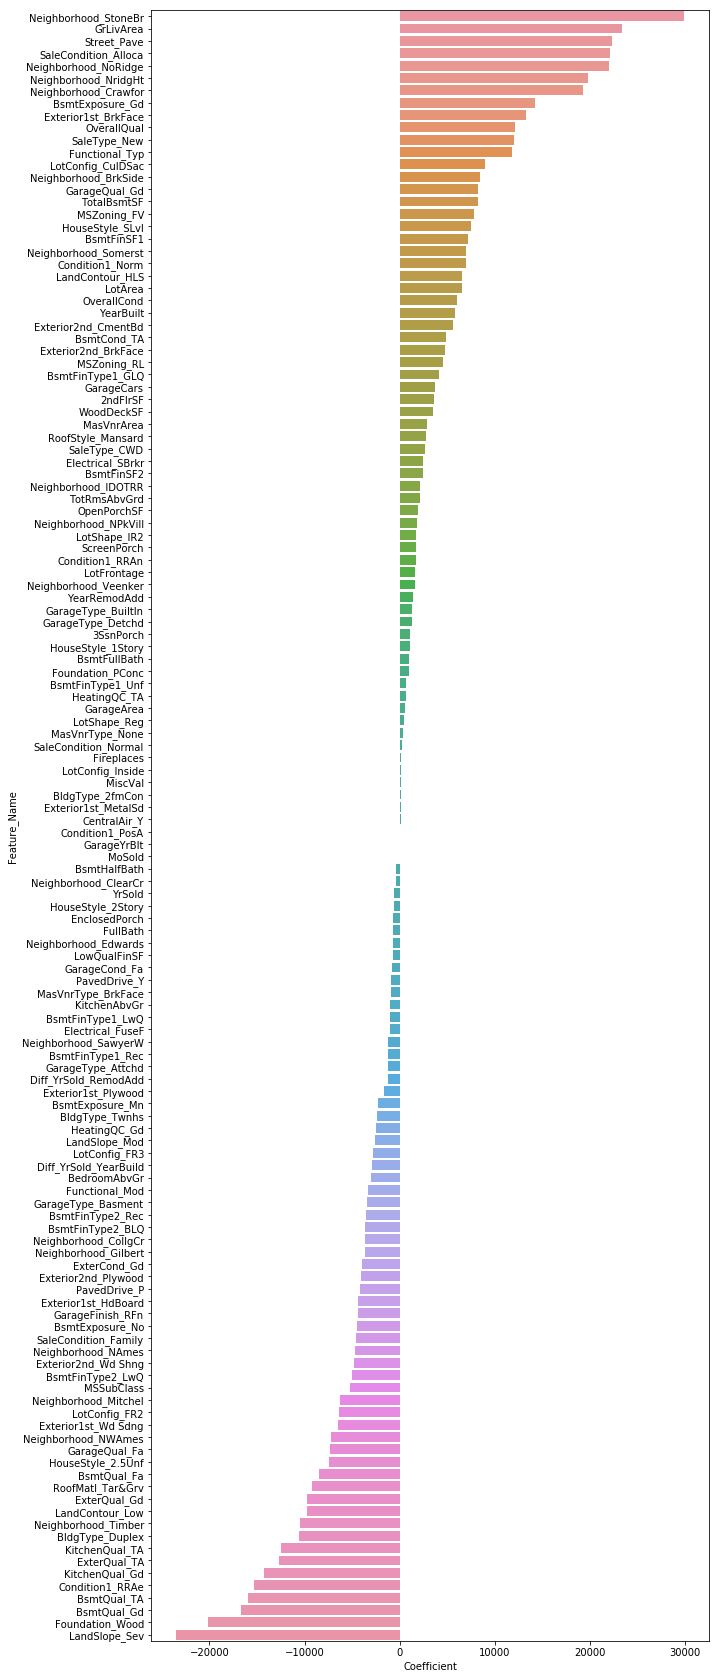

In [370]:
# plotting a horizontal barplot of the features
f, ax = plt.subplots(figsize=(10, 30))
sns.barplot('Coefficient', 'Feature_Name', data = feature_list_df)
plt.show()

The above barplot is plotted in descending order with the features on the top has the highest positive impact on price and the features at the bottom has the highest negative impact on the price. For example if the Neighborhood is in Stone Brook (Neighborhood_StoneBr) the SalePrice will be increased the most i.e, by 29826.103 units. Similarly if the LandSlope is Severe Sloped (LandSlope_Sev) the SalePrice will be decreased the most i.e, by -23477.447 units.

The plot is highli intuitive, however, inorder to analyse the significance of the variables and how the impact the price folowing approach can be taken:
-  For positive increasing impact start from center and move up.
-  For negative increasing impact start from center and move down.